In [45]:
!pip install pyspark

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [71]:
# Load the dataset
# NOTE: Fix your dataset location in case you run locally on your machine
sales = spark.read.load('/content/drive/MyDrive/archive/Sales.csv', format='csv', inferSchema=True, header=True)

# Print schema
sales.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Unnamed: 0.1: integer (nullable = true)
 |-- Unnamed: 0: integer (nullable = true)
 |-- date_: date (nullable = true)
 |-- city_name: string (nullable = true)
 |-- order_id: integer (nullable = true)
 |-- cart_id: integer (nullable = true)
 |-- dim_customer_key: integer (nullable = true)
 |-- procured_quantity: integer (nullable = true)
 |-- unit_selling_price: double (nullable = true)
 |-- total_discount_amount: double (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- total_weighted_landing_price: double (nullable = true)



In [72]:
# Load the dataset
# NOTE: Fix your dataset location in case you run locally on your machine
products = spark.read.load('/content/drive/MyDrive/archive/products.csv', format='csv', inferSchema=True, header=True)

# Print schema
products.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- product_name: string (nullable = true)
 |-- unit: string (nullable = true)
 |-- product_type: string (nullable = true)
 |-- brand_name: string (nullable = true)
 |-- manufacturer_name: string (nullable = true)
 |-- l0_category: string (nullable = true)
 |-- l1_category: string (nullable = true)
 |-- l2_category: string (nullable = true)
 |-- l0_category_id: string (nullable = true)
 |-- l1_category_id: integer (nullable = true)
 |-- l2_category_id: integer (nullable = true)



In [ ]:
row_count = sales.count()
print(f"Number of rows in the sales: {row_count}")
sales.show()

In [73]:
sales.columns

['_c0',
 'Unnamed: 0.1',
 'Unnamed: 0',
 'date_',
 'city_name',
 'order_id',
 'cart_id',
 'dim_customer_key',
 'procured_quantity',
 'unit_selling_price',
 'total_discount_amount',
 'product_id',
 'total_weighted_landing_price']

In [74]:
sales_cleaned = sales.drop('Unnamed: 0.1','Unnamed: 0')
sales_cleaned.show()

+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------+----------------------------+
|_c0|     date_|city_name| order_id|  cart_id|dim_customer_key|procured_quantity|unit_selling_price|total_discount_amount|product_id|total_weighted_landing_price|
+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------+----------------------------+
|  0|2022-04-01|   Mumbai|112246974|173273802|        17995199|                1|             234.0|                  0.0|    344107|                   202.51303|
|  1|2022-04-01|Bengaluru|112246976|173273597|        18259433|                1|              64.0|                  0.0|    389676|                   48.714375|
|  2|2022-04-01|Bengaluru|112247019|173123717|         5402601|                1|            1031.0|                  0.0|     39411|                     975.996|
|  3|2022-04-01|   HR-

In [76]:
sales_cleaned = sales_cleaned.na.drop()
# df_cleaned = data.na.drop(subset=["brand_name"])
# row_count = sales_cleaned.count()
print(f"Number of rows in the DataFrame: {row_count}")
# sales_cleaned.show()

Number of rows in the DataFrame: 46627032


In [77]:
from pyspark.sql.functions import month
sales = sales_cleaned.withColumn("month", month("date_"))
sales = sales.withColumn("day", dayofmonth("date_"))
sales.show()

+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------+----------------------------+-----+---+
|_c0|     date_|city_name| order_id|  cart_id|dim_customer_key|procured_quantity|unit_selling_price|total_discount_amount|product_id|total_weighted_landing_price|month|day|
+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------+----------------------------+-----+---+
|  0|2022-04-01|   Mumbai|112246974|173273802|        17995199|                1|             234.0|                  0.0|    344107|                   202.51303|    4|  1|
|  1|2022-04-01|Bengaluru|112246976|173273597|        18259433|                1|              64.0|                  0.0|    389676|                   48.714375|    4|  1|
|  2|2022-04-01|Bengaluru|112247019|173123717|         5402601|                1|            1031.0|                  0.0|     39411|  

In [78]:
row_count = products.count()
print(f"Number of rows in the products: {row_count}")
products.show()

Number of rows in the products: 32226
+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+------------+--------------+--------------+--------------+
|_c0|product_id|        product_name|             unit|product_type|          brand_name|   manufacturer_name|l0_category| l1_category| l2_category|l0_category_id|l1_category_id|l2_category_id|
+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+------------+--------------+--------------+--------------+
|  0|    476763|    Christmas - Card|           1 unit|        Card|                NULL|                 HOT|   Specials|Bill Breaker|Bill Breaker|           343|          1741|          1741|
|  1|    483436|Plum BodyLovin' H...|            20 ml|      Sample|     Plum BodyLovin'|Pureplay Skin Sci...|   Specials|  Free Store|  Free Store|           343|          1493|        

In [79]:
products_cleaned = products.drop('l2_category','l2_category_id')
products_cleaned.show()

+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+--------------+--------------+
|_c0|product_id|        product_name|             unit|product_type|          brand_name|   manufacturer_name|l0_category| l1_category|l0_category_id|l1_category_id|
+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+--------------+--------------+
|  0|    476763|    Christmas - Card|           1 unit|        Card|                NULL|                 HOT|   Specials|Bill Breaker|           343|          1741|
|  1|    483436|Plum BodyLovin' H...|            20 ml|      Sample|     Plum BodyLovin'|Pureplay Skin Sci...|   Specials|  Free Store|           343|          1493|
|  2|    476825|Diwali Gift Card ...|           1 unit|      Sample|                NULL|                 HOT|   Specials|Bill Breaker|           343|          1741|
|  3

In [80]:
products_cleaned = products_cleaned.na.drop()
# df_cleaned = data.na.drop(subset=["brand_name"])
row_count = products_cleaned.count()
print(f"Number of rows in the DataFrame: {row_count}")
products_cleaned.show()

Number of rows in the DataFrame: 29030
+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+--------------+--------------+
|_c0|product_id|        product_name|             unit|product_type|          brand_name|   manufacturer_name|l0_category| l1_category|l0_category_id|l1_category_id|
+---+----------+--------------------+-----------------+------------+--------------------+--------------------+-----------+------------+--------------+--------------+
|  1|    483436|Plum BodyLovin' H...|            20 ml|      Sample|     Plum BodyLovin'|Pureplay Skin Sci...|   Specials|  Free Store|           343|          1493|
|  3|    483438|Plum BodyLovin' T...|            20 ml|      Sample|     Plum BodyLovin'|Pureplay Skin Sci...|   Specials|  Free Store|           343|          1493|
|  4|    480473|Flipkart Valentin...|           1 unit|        Card|            Flipkart|  Dummy Manufacturer|   Specials|Bill Brea

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

orders= products_cleaned.groupBy("brand_name").count().orderBy(desc("count"))

orders = spark.createDataFrame(orders.limit(10).collect())
orders = orders.toPandas()
orders

,brand_name,count
0,GHH,582
1,GMC,457
2,Aplus,317
3,GHD,268
4,Amul,253
5,Town Grocer,233
6,Haldiram's,215
7,Apple,177
8,SaveMore,161
9,Grocery,156


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(orders["brand_name"], orders["count"], marker='o')
plt.title("Top 10 Product_Types sold")
plt.xlabel("Product_Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [ ]:
from pyspark.sql.functions import *
import matplotlib.pyplot as plt

orders= products_cleaned.groupBy("product_type").count().orderBy(desc("count"))

orders = spark.createDataFrame(orders.limit(10).collect())
orders = orders.toPandas()
orders

,product_type,count
0,Ice Cream,360
1,Namkeen,298
2,Cookies,281
3,Shampoo,280
4,Biscuit,273
5,Face Wash,270
6,Gift Pack,267
7,Tea,229
8,Sauce,218
9,Soap,214


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(orders["product_type"], orders["count"], marker='o')
plt.title("Top 10 Product_Types sold")
plt.xlabel("Product_Type")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [89]:
sales_filtered = sales.filter(month("date_") == 4)
orders = sales_filtered.groupBy("day").pivot("city_name").count().orderBy('day')
orders = orders.toPandas()
orders

,day,Bengaluru,Delhi,HR-NCR,Mumbai
0,1,99583,228935,134694,51952
1,2,104447,243469,145910,60905
2,3,104020,275611,155521,61682
3,4,91156,211767,126514,47392
4,5,91961,221394,127473,47816
5,6,93151,231768,124884,51123
6,7,92486,234629,126037,52349
7,8,89042,235132,127555,48125
8,9,96893,241485,134456,50179
9,10,97974,249006,137916,52381


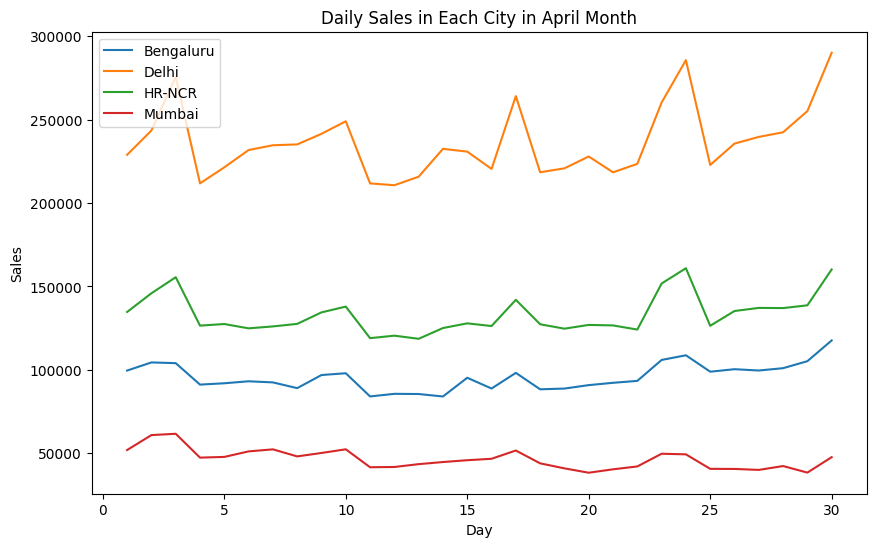

In [90]:
# Plot the line graph
ax = orders.plot(kind='line', x='day', figsize=(10, 6))
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Daily Sales in Each City in April Month')

# Show the plot
plt.show()

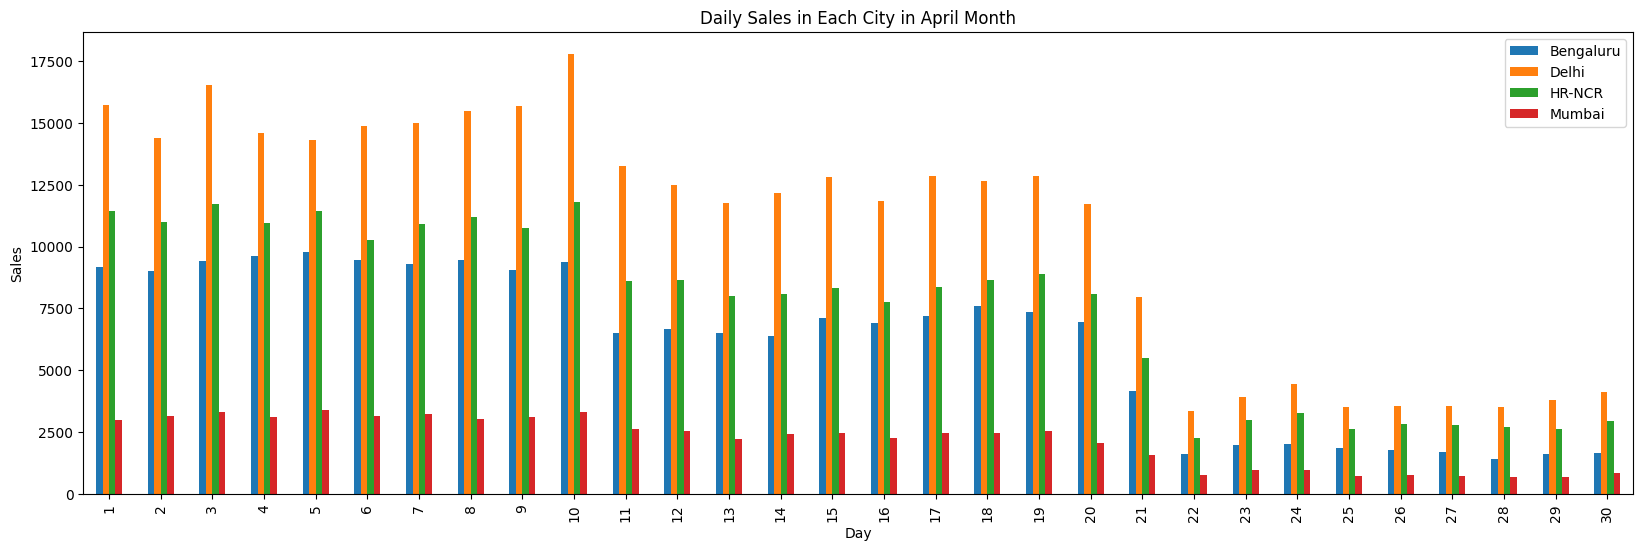

In [99]:
# Plot the line graph
ax = orders.plot(kind='bar', x='day', figsize=(20, 6))
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Daily Sales in Each City in April Month')

# Show the plot
plt.show()

In [56]:
orders = sales.groupBy("city_name").pivot("Month").count()
orders = orders.withColumnRenamed("4", "April")
orders = orders.withColumnRenamed("5", "May")
orders = orders.withColumnRenamed("6", "June")
orders = orders.withColumnRenamed("7", "July")
orders = orders.toPandas()
orders
# pivot_df = df.groupBy("City").pivot("Month").sum("Sales")

,city_name,April,May,June,July
0,Mumbai,1394305,906435,962490,593045
1,Delhi,7099766,5773037,5499236,3045605
2,Bengaluru,2873276,2551489,2625403,1459318
3,HR-NCR,3997385,3117866,3061541,1666835


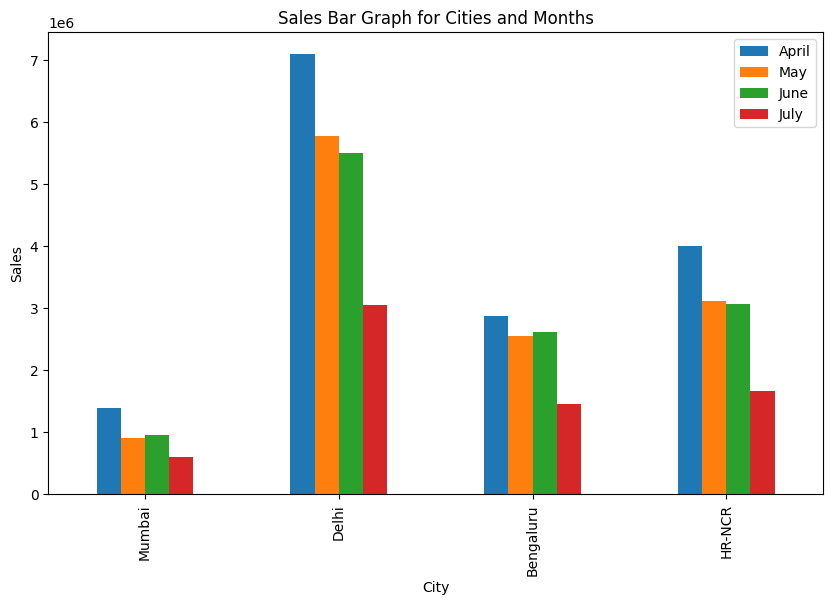

In [57]:
# Plot the bar graph
ax = orders.plot(kind='bar', x='city_name', figsize=(10, 6))
ax.set_xlabel('City')
ax.set_ylabel('Sales')
ax.set_title('Sales Bar Graph for Cities and Months')

# Show the plot
plt.show()

# Stop the Spark session
spark.stop()

In [ ]:
product_sales = sales.groupBy("product_id").count().orderBy(desc("count"))
product_sales = spark.createDataFrame(product_sales.limit(10).collect())


In [88]:
product_sales

,product_id,count
0,391306,793144
1,3881,489306
2,19512,485501
3,445675,482282
4,423735,437936
5,3889,409234
6,10088,364989
7,333785,341465
8,12872,339696
9,17748,308062


In [94]:
sales_filtered = sales.filter(col('product_id') == 391306)
orders = sales_filtered.groupBy("day").pivot("city_name").count().orderBy('day')
orders = orders.toPandas()
orders

,day,Bengaluru,Delhi,HR-NCR,Mumbai
0,1,9158,15724,11421,3007
1,2,8994,14378,10987,3137
2,3,9427,16542,11734,3328
3,4,9637,14585,10966,3101
4,5,9775,14320,11427,3412
5,6,9451,14864,10260,3151
6,7,9314,14995,10923,3231
7,8,9464,15494,11183,3032
8,9,9037,15703,10751,3130
9,10,9357,17786,11795,3313


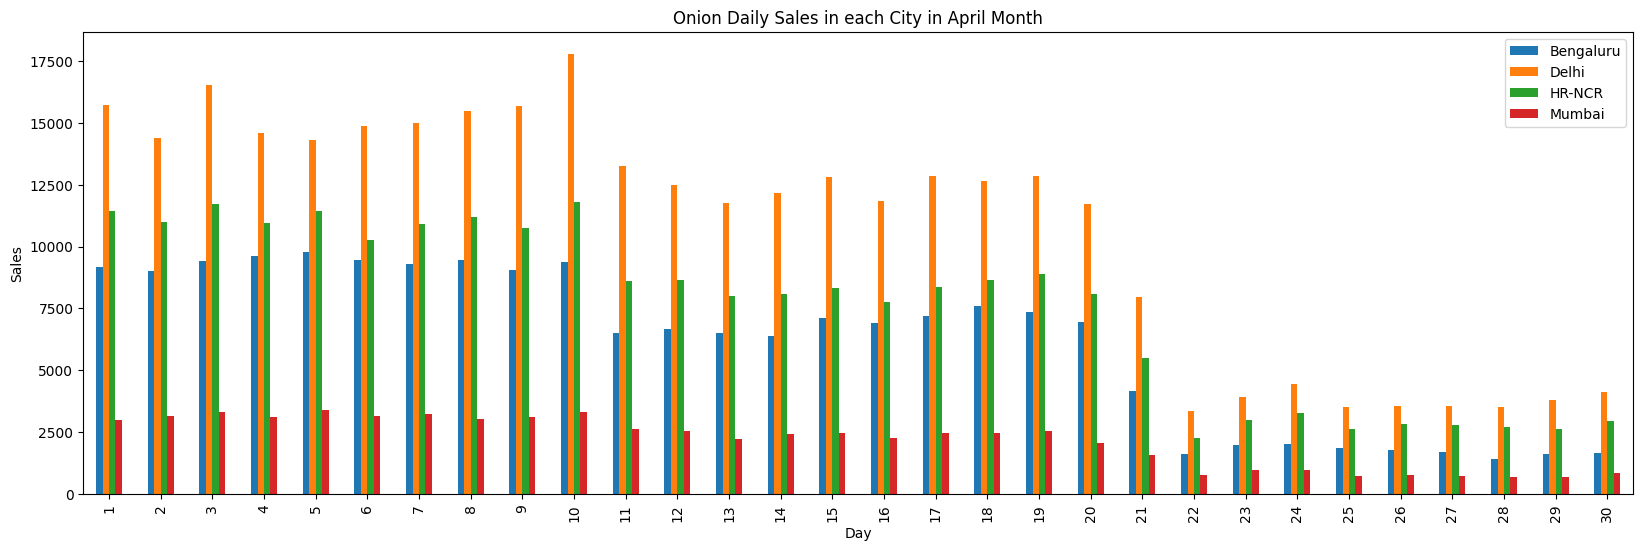

In [97]:
# Plot the line graph
ax = orders.plot(kind='bar', x='day', figsize=(20, 6))
ax.set_xlabel('Day')
ax.set_ylabel('Sales')
ax.set_title('Onion Daily Sales in each City in April Month')

# Show the plot
plt.show()

In [112]:
join_dataset = sales.join(products_cleaned, "product_id")
join_dataset.show()

+----------+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------------------------+-----+---+-----+--------------------+---------+-------------+-----------------+--------------------+--------------------+--------------------+--------------+--------------+
|product_id|_c0|     date_|city_name| order_id|  cart_id|dim_customer_key|procured_quantity|unit_selling_price|total_discount_amount|total_weighted_landing_price|month|day|  _c0|        product_name|     unit| product_type|       brand_name|   manufacturer_name|         l0_category|         l1_category|l0_category_id|l1_category_id|
+----------+---+----------+---------+---------+---------+----------------+-----------------+------------------+---------------------+----------------------------+-----+---+-----+--------------------+---------+-------------+-----------------+--------------------+--------------------+--------------------+--------------+-----------

In [121]:
from pyspark.sql.functions import col, sum, desc
filtered = join_dataset.filter(col('l0_category') == 'Cleaning Essentials')
orders = filtered.groupBy("brand_name").count().orderBy(desc("count"))
orders = spark.createDataFrame(orders.limit(10).collect())
orders = orders.toPandas()
orders


,brand_name,count
0,Vim,242488
1,Surf Excel,201130
2,Harpic,156366
3,Scotch Brite,87626
4,Tide,87020
5,Rin,72084
6,Lizol,68011
7,Patanjali,67044
8,Ghadi,59774
9,Gala,58856


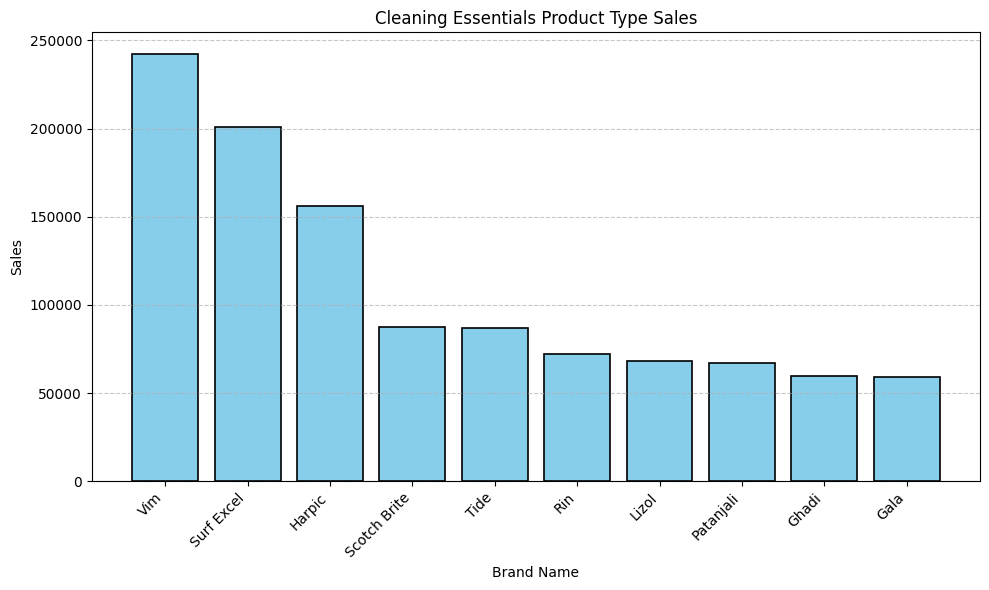

In [122]:
import matplotlib.pyplot as plt

# Assuming "brand_name" and "count" are the relevant columns in your 'orders' DataFrame
plt.figure(figsize=(10, 6))
plt.bar(orders["brand_name"], orders["count"], color='skyblue', edgecolor='black', linewidth=1.2)
plt.title("Cleaning Essentials Product Type Sales")
plt.xlabel("Brand Name")
plt.ylabel("Sales")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines on the y-axis
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
filtered = join_dataset.filter(col('l0_category') == 'Cleaning Essentials')
orders = filtered.groupBy("brand_name").pivot("city_name").count().orderBy(desc("Delhi"))
orders1 = spark.createDataFrame(orders.limit(10).collect())
orders2 = orders1.toPandas()
orders2


In [ ]:
# Plot the line graph
ax = orders2.plot(kind='line', x='brand_name', figsize=(20, 6), marker='o')
ax.set_xlabel('Brand Name')
ax.set_ylabel('Sales')
ax.set_title('Cleaning Essentials Sales in Each City')

# Show the plot
plt.show()

In [129]:
filtered = join_dataset.filter(col('l0_category') == 'Cleaning Essentials')
orders = filtered.groupBy("brand_name").pivot("month").count().orderBy(desc("4"))
orders = orders.withColumnRenamed("4", "April")
orders = orders.withColumnRenamed("5", "May")
orders = orders.withColumnRenamed("6", "June")
orders = orders.withColumnRenamed("7", "July")


In [130]:
orders1 = spark.createDataFrame(orders.limit(10).collect())
orders2 = orders1.toPandas()
orders2

,brand_name,April,May,June,July
0,Vim,83358,59189,63180,36761
1,Surf Excel,69163,50323,52387,29257
2,Harpic,51269,40937,39379,24781
3,Tide,29652,24158,19180,14030
4,Scotch Brite,28248,22823,22575,13980
5,Rin,25670,19133,16855,10426
6,Patanjali,25548,18568,14780,8148
7,SaveMore,24726,9910,4245,802
8,Ghadi,24649,12296,13290,9539
9,Lizol,22602,17053,17539,10817


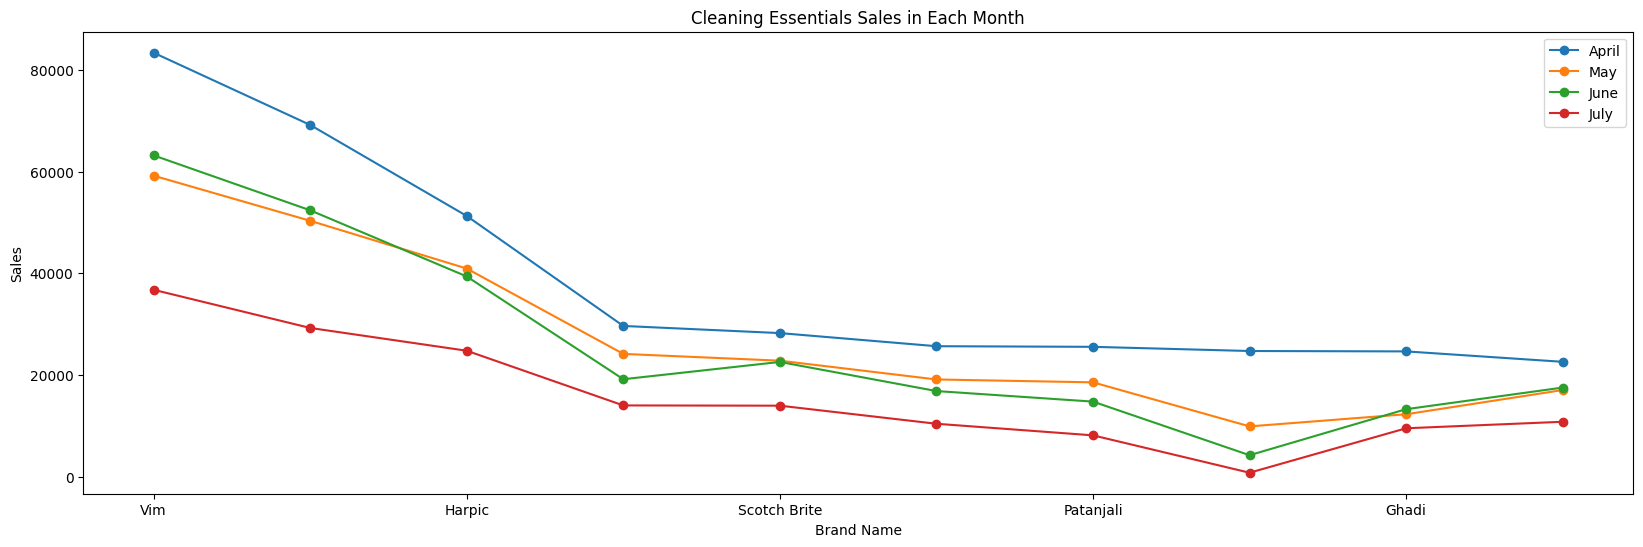

In [135]:
# Plot the line graph
ax = orders2.plot(kind='line', x='brand_name', figsize=(20, 6), marker = 'o')
ax.set_xlabel('Brand Name')
ax.set_ylabel('Sales')
ax.set_title('Cleaning Essentials Sales in Each Month')

# Show the plot
plt.show()

In [100]:
orders= products_cleaned.groupBy("brand_name").count().orderBy(desc("count"))

orders = spark.createDataFrame(orders.limit(10).collect())
orders = orders.toPandas()
orders


,brand_name,count
0,GHH,582
1,GMC,457
2,Aplus,317
3,GHD,268
4,Amul,253
5,Town Grocer,233
6,Haldiram's,215
7,Apple,177
8,SaveMore,161
9,Grocery,156


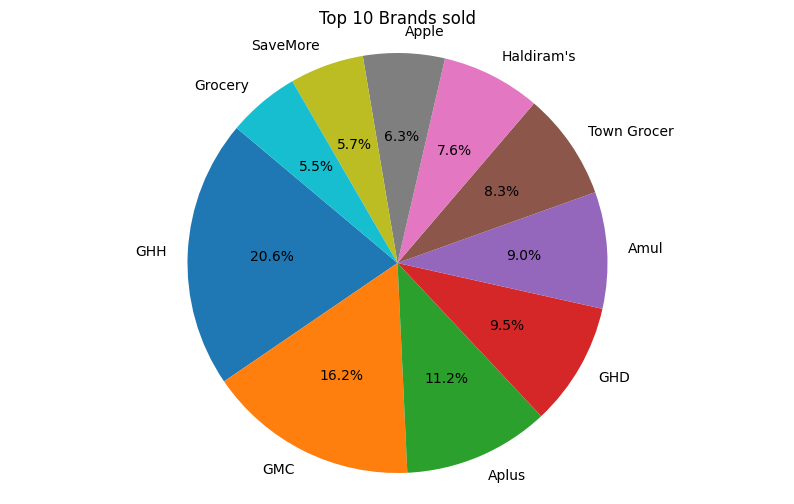

In [111]:
import matplotlib.pyplot as plt

# Assuming "brand_name" and "count" are the relevant columns in your 'orders' DataFrame
plt.figure(figsize=(10, 6))
plt.pie(orders["count"], labels=orders["brand_name"], autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Brands sold")
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

In [ ]:
orders= sales_cleaned.groupBy("total_discount_amount").count().orderBy(desc("total_discount_amount"))

In [ ]:
orders = spark.createDataFrame(orders.limit(10).collect())
orders = orders.toPandas()
orders.show()

,total_discount_amount,count
0,1500.0,28
1,1473.0,1
2,1447.0,1
3,1414.0,1
4,1403.0,1
5,1374.0,1
6,1363.0,1
7,1360.0,1
8,1356.0,1
9,1353.0,2


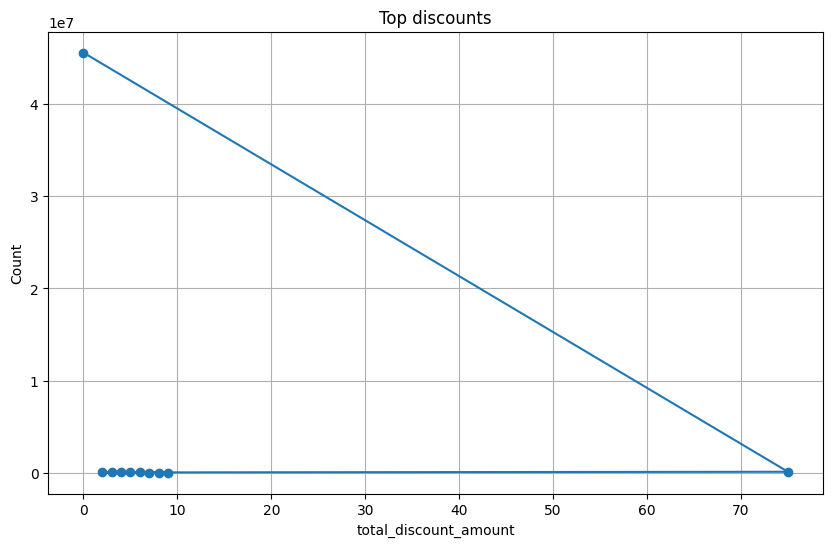

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(orders["total_discount_amount"], orders["count"], marker='o')
plt.title("Top discounts")
plt.xlabel("total_discount_amount")
plt.ylabel("Count")
plt.grid(True)
plt.show()